In [170]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense, RepeatVector

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
# 2. Đọc file csv và gắng index với giá Close
file_path = "/content/drive/MyDrive/crt/ELCGRU.csv"
data = pd.read_csv(file_path)
data

,Date,Price
0,15/12/2023,18800.0
1,14/12/2023,19150.0
2,13/12/2023,18900.0
3,12/12/2023,19350.0
4,11/12/2023,19350.0
...,...,...
1744,21/12/2016,19855.5
1745,20/12/2016,20076.9
1746,19/12/2016,20298.3
1747,16/12/2016,20298.3


In [173]:
# Xử lý dữ liệu
prices = data['Price']

In [174]:
returns = 100 * data.Price.pct_change().dropna()

# Scale the prices using MinMaxScaler
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(data.Price.values.reshape(-1, 1))

Ratio 7-3


In [175]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [176]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [177]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [178]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [179]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [180]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [181]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
19/19 [==============================] - 3s 19ms/step - loss: 0.0363
Epoch 2/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0063
Epoch 3/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0012
Epoch 4/100
19/19 [==============================] - 0s 19ms/step - loss: 7.7245e-04
Epoch 5/100
19/19 [==============================] - 0s 20ms/step - loss: 6.7700e-04
Epoch 6/100
19/19 [==============================] - 0s 20ms/step - loss: 6.4272e-04
Epoch 7/100
19/19 [==============================] - 0s 19ms/step - loss: 6.2588e-04
Epoch 8/100
19/19 [==============================] - 0s 20ms/step - loss: 6.0573e-04
Epoch 9/100
19/19 [==============================] - 0s 19ms/step - loss: 6.0634e-04
Epoch 10/100
19/19 [==============================] - 0s 19ms/step - loss: 5.9144e-04
Epoch 11/100
19/19 [==============================] - 0s 26ms/step - loss: 5.6588e-04
Epoch 12/100
19/19 [==============================] - 1s 30ms/step - loss: 

In [182]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

16/16 [==============================] - 1s 8ms/step
[[1750]
 [1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]
 [1775]
 [1776]
 [1777]
 [1778]
 [1779]]
1/1 [==============================] - 0s 39ms/step
[17509.178 17856.732 18044.473 18066.053 17804.42  17759.375 17759.299
 18279.045 18431.918 18246.111 18145.332 18457.82  18381.904 18229.04
 18140.627 18584.418 18660.3   19114.143 19250.703 19648.566 19641.154
 19494.502 19534.688 19804.447 19909.059 19849.54  19900.5   19908.102
 20101.922 20326.572]


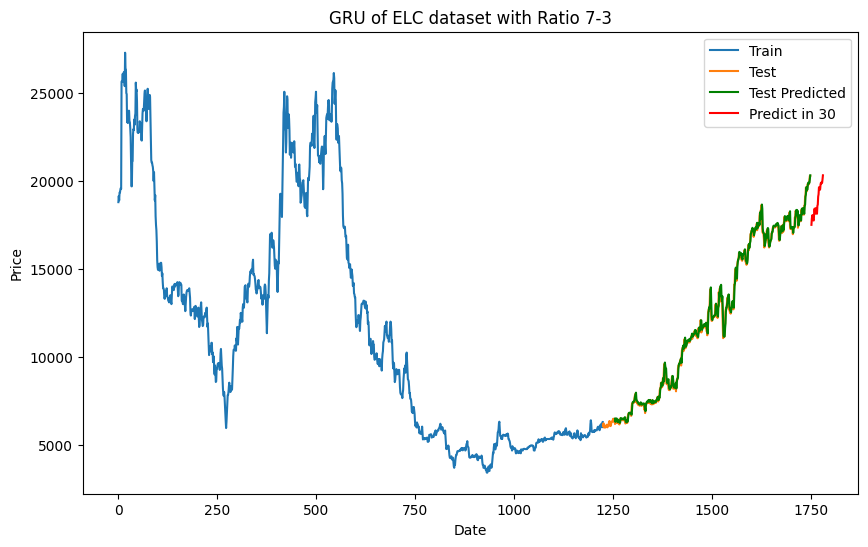

In [183]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GRU of ELC dataset with Ratio 7-3')
plt.legend()
plt.show()

In [184]:
# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test=y_test.reshape(-1,1)
y_test
y_test= scaler.inverse_transform(y_test)
y_test
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

16/16 [==============================] - 0s 6ms/step


In [185]:
print('---------TEST----------')

print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))

#print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 0.016
MAE: 183.659
RMSE: 264.258
-------------------


Ratio 8-2


In [186]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.8)
test_size = int(len(scaled_prices) * 0.2)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [187]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [188]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [189]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [190]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [191]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [192]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
22/22 [==============================] - 4s 31ms/step - loss: 0.0172
Epoch 2/100
22/22 [==============================] - 1s 30ms/step - loss: 0.0016
Epoch 3/100
22/22 [==============================] - 1s 28ms/step - loss: 6.3887e-04
Epoch 4/100
22/22 [==============================] - 1s 30ms/step - loss: 5.1453e-04
Epoch 5/100
22/22 [==============================] - 1s 26ms/step - loss: 4.8861e-04
Epoch 6/100
22/22 [==============================] - 0s 19ms/step - loss: 4.7282e-04
Epoch 7/100
22/22 [==============================] - 0s 20ms/step - loss: 4.6117e-04
Epoch 8/100
22/22 [==============================] - 0s 21ms/step - loss: 4.4445e-04
Epoch 9/100
22/22 [==============================] - 0s 20ms/step - loss: 4.3636e-04
Epoch 10/100
22/22 [==============================] - 0s 22ms/step - loss: 4.2230e-04
Epoch 11/100
22/22 [==============================] - 0s 20ms/step - loss: 4.1276e-04
Epoch 12/100
22/22 [==============================] - 0s 20ms/step - lo

In [193]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

10/10 [==============================] - 0s 5ms/step
[[1750]
 [1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]
 [1775]
 [1776]
 [1777]
 [1778]
 [1779]]
1/1 [==============================] - 0s 26ms/step
[17511.252 17866.775 17994.135 17993.879 17683.396 17714.404 17701.455
 18334.916 18352.373 18132.576 18078.611 18473.033 18271.447 18144.2
 18072.445 18628.912 18569.762 19148.389 19169.016 19662.07  19532.
 19400.729 19490.473 19792.803 19839.652 19762.252 19851.463 19837.424
 20078.76  20289.824]


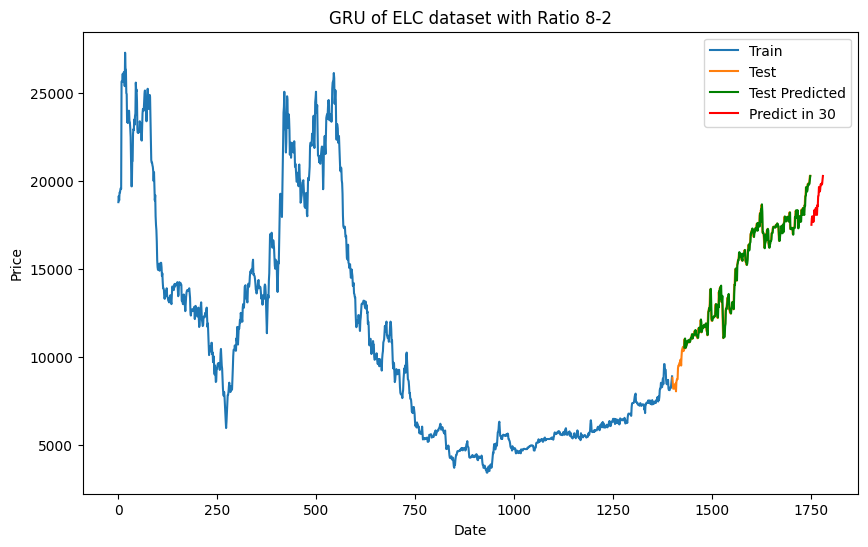

In [194]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GRU of ELC dataset with Ratio 8-2')
plt.legend()
plt.show()

In [195]:
# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test=y_test.reshape(-1,1)
y_test
y_test= scaler.inverse_transform(y_test)
y_test
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

10/10 [==============================] - 0s 7ms/step


In [196]:

print('---------TEST----------')

print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))

#print("MSLE:", round(msle_test,3))
print('-------------------')

---------TEST----------
MAPE: 0.013
MAE: 195.92
RMSE: 287.474
-------------------


Ratio 9-1

In [197]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.9)
test_size = int(len(scaled_prices) * 0.1)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [198]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [199]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [200]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [201]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [202]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [203]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
25/25 [==============================] - 3s 20ms/step - loss: 0.0235
Epoch 2/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0021
Epoch 3/100
25/25 [==============================] - 0s 19ms/step - loss: 6.1038e-04
Epoch 4/100
25/25 [==============================] - 0s 19ms/step - loss: 5.3916e-04
Epoch 5/100
25/25 [==============================] - 0s 19ms/step - loss: 5.1858e-04
Epoch 6/100
25/25 [==============================] - 0s 19ms/step - loss: 4.9186e-04
Epoch 7/100
25/25 [==============================] - 0s 19ms/step - loss: 4.8106e-04
Epoch 8/100
25/25 [==============================] - 0s 19ms/step - loss: 4.6089e-04
Epoch 9/100
25/25 [==============================] - 0s 19ms/step - loss: 4.5719e-04
Epoch 10/100
25/25 [==============================] - 0s 19ms/step - loss: 4.3222e-04
Epoch 11/100
25/25 [==============================] - 0s 19ms/step - loss: 4.1623e-04
Epoch 12/100
25/25 [==============================] - 0s 19ms/step - lo

In [204]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

5/5 [==============================] - 1s 8ms/step
[[1750]
 [1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]
 [1775]
 [1776]
 [1777]
 [1778]
 [1779]]
1/1 [==============================] - 0s 41ms/step
[17248.666 17616.191 17761.53  17762.906 17461.719 17468.814 17464.967
 18070.04  18130.861 17907.676 17837.477 18213.664 18049.57  17905.512
 17830.885 18360.447 18344.404 18881.057 18939.395 19397.035 19302.908
 19154.178 19230.004 19526.44  19589.938 19511.227 19587.576 19580.494
 19807.492 20025.51 ]


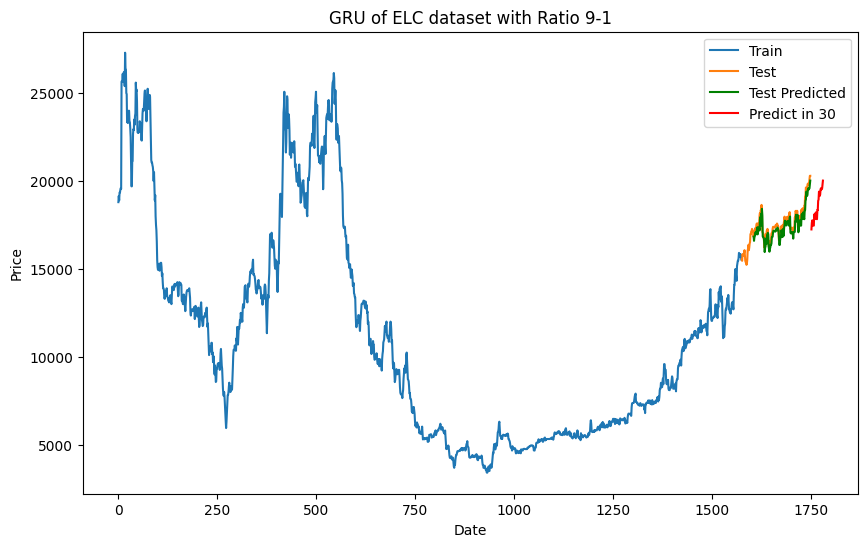

In [205]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GRU of ELC dataset with Ratio 9-1')
plt.legend()
plt.show()

In [206]:
# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test=y_test.reshape(-1,1)
y_test
y_test= scaler.inverse_transform(y_test)
y_test
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

5/5 [==============================] - 0s 8ms/step


In [207]:

print('---------TEST----------')

print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))

#print("MSLE:", round(msle_test,3))
print('-------------------')

---------TEST----------
MAPE: 0.018
MAE: 316.896
RMSE: 376.172
-------------------
